# Using pandas data frames to analyze single cell electrophysiology data

###  *** Set file path to day-2 of the python_neurobootcamp ***
* Note, this won't change if we're all working on the same server, might have to change for each person's user name?

In [1]:
path = '/home/charlie/Desktop/python_bootcamp/python_neurobootcamp/day-2/'

Importing built in python modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing custom module called "binary_file_loading_tools" that will help us load our raw data
* Then from this library we import the function called binary_to_csv 
* special note - in order to use binary_to_csv, the python module neo must be installed. This should already be taken care of by your TAs. If not, open a terminal and type: pip install neo

In [3]:
from binary_file_loading_tools import binary_to_csv

## Loading data for a single cell

bin_to_csv loads binary data files created by your patching software (.abf, .dat etc.) and transorms them into .csv files (which it saves under "day-2/csv_data/"). It also returns the data in two pandas data frames. One containing meta data, one containing the physiology traces

* If you're interested in how this function works, or want to modify it to suit your own needs, you can go check it out yourself. We won't cover this in class today for time's sake


In [4]:
meta, data = binary_to_csv(filename=path+'Raw_Data/PV_3_10_03_2014.abf')

saving data in csv format. Stored in csv_data folder


We have now read our data into two pandas data frames: meta and data. However, it is often desirable to load a spreadsheet of data, such as a .csv file. Pandas is very well suited to do this. To demonstrate how this is done, we'll now reload this data from the .csv files that were created by running binary_to_csv

In [5]:
meta = pd.read_csv(path+"csv_data/meta_data_PV_3_10_03_2014.csv", index_col=0)
data = pd.read_csv(path+"csv_data/data_PV_3_10_03_2014.csv",index_col=0)

To take a peak at our data, we can type the name of our data frame, followed by ".head()". This will show us the first 5 rows of the data in spreadsheet format. 

In [6]:
meta.head()

,fs,celltype,date,ch1_units,ch2_units
sweep1,100000.0,PV,10_03_2014,mV,pA
sweep2,100000.0,PV,10_03_2014,mV,pA
sweep3,100000.0,PV,10_03_2014,mV,pA
sweep4,100000.0,PV,10_03_2014,mV,pA
sweep5,100000.0,PV,10_03_2014,mV,pA


* Notice that in our meta data, we have information about the sampling rate (fs), celltype, date of recording, units for ch1 data, and units for ch2 data for each sweep in the binary file that we loaded.

In [7]:
data.head()

,ch1_sweep1,ch2_sweep1,ch1_sweep2,ch2_sweep2,ch1_sweep3,ch2_sweep3,ch1_sweep4,ch2_sweep4,ch1_sweep5,ch2_sweep5,...,ch1_sweep16,ch2_sweep16,ch1_sweep17,ch2_sweep17,ch1_sweep18,ch2_sweep18,ch1_sweep19,ch2_sweep19,ch1_sweep20,ch2_sweep20
0.00000,-48.889160,0.0,-49.652100,0.0,-49.224854,0.0,-48.675537,0.0,-48.187256,0.0,...,-51.330566,0.0,-52.947998,0.0,-55.236816,0.0,-52.856445,0.0,-53.619385,0.0
0.00001,-49.011230,0.0,-49.926758,0.0,-49.194336,0.0,-48.583984,0.0,-47.912598,0.0,...,-51.300049,0.0,-52.947998,0.0,-55.206299,0.0,-52.917480,0.0,-53.466797,0.0
0.00002,-49.072266,0.0,-49.743652,0.0,-49.255371,0.0,-48.400879,0.0,-47.882080,0.0,...,-51.086426,0.0,-52.856445,0.0,-55.023193,0.0,-53.100586,0.0,-53.833008,0.0
0.00003,-48.980713,0.0,-49.682617,0.0,-49.163818,0.0,-48.492432,0.0,-48.095703,0.0,...,-50.994873,0.0,-52.917480,0.0,-55.023193,0.0,-52.917480,0.0,-53.833008,0.0
0.00004,-49.041748,0.0,-49.774170,0.0,-49.041748,0.0,-48.553467,0.0,-48.065186,0.0,...,-51.422119,0.0,-53.100586,0.0,-55.358887,0.0,-52.886963,0.0,-53.619385,0.0


* Though the channels aren't labeled, we can determine what each represents by the their units (pico-amps or milli-volts in this case) which we can get above (in meta data)
* Notice that data contains the time series for each channel on each sweep. The indexes here represent the time points that each value was acquired at

### Some quick pandas tricks for inspecting data frames

In [8]:
# Let's check out the meta data frame

# How many sweeps are there?
print('Rows in meta:')
print(meta.index)

# To only see the number, try:
print('Number of sweeps:')
print(len(meta.index))

# What information do we have about each sweep? i.e. what are the column names?
print('Columns in meta:')
print(meta.columns)

# Can I see only the information for one column?
cols = meta.columns
firstCol = cols[0]
OneCol = meta[firstCol]
OneCol.head()

Rows in meta:
Index([u'sweep1', u'sweep2', u'sweep3', u'sweep4', u'sweep5', u'sweep6',
       u'sweep7', u'sweep8', u'sweep9', u'sweep10', u'sweep11', u'sweep12',
       u'sweep13', u'sweep14', u'sweep15', u'sweep16', u'sweep17', u'sweep18',
       u'sweep19', u'sweep20'],
      dtype='object')
Number of sweeps:
20
Columns in meta:
Index([u'fs', u'celltype', u'date', u'ch1_units', u'ch2_units'], dtype='object')


sweep1    100000.0
sweep2    100000.0
sweep3    100000.0
sweep4    100000.0
sweep5    100000.0
Name: fs, dtype: float64

## Visualize the raw data
* Before we get into analysis, it's always a good idea to inspect your raw data to make sure you know what's there, and that it was loaded properly

In [9]:
# Use pandas built in filter function to assign all ch1 traces to a data frame called voltage traces and all
# ch2 traces to a data frame called current_traces

# Using regular expressions to filter

voltage_traces = data.filter(regex="ch1.")
current_traces = data.filter(regex="ch2.")

Plotting both the current traces and the voltage traces using matplotlib.

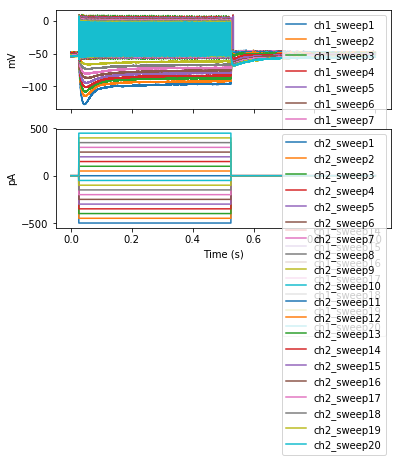

In [10]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(voltage_traces)
ax[0].set_ylabel(meta['ch1_units'][0])
ax[0].legend(voltage_traces.columns, loc='upper right')
ax[1].plot(current_traces)
ax[1].set_ylabel(meta['ch2_units'][0])
ax[1].set_xlabel('Time (s)')
ax[1].legend(current_traces.columns, loc='upper right')
plt.show()

This is really messy.
#### Excercise: 
* Try plotting only the last sweep of both current and voltage so that we can see what's going on more easily

In [11]:
# First find the column name for the last sweep in each df using the "tricks" above:
lastSweep_voltage = voltage_traces.columns[-1]
lastSweep_current = current_traces.columns[-1]

print(lastSweep_voltage)
print(lastSweep_current)

ch1_sweep20
ch2_sweep20


In [12]:
# Now, use these id's to select only the column containing the last sweep
last_voltage = voltage_traces[lastSweep_voltage]
last_current = current_traces[lastSweep_current]

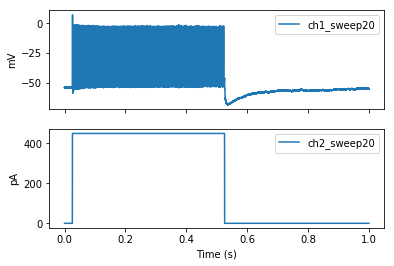

In [13]:
# Now use these column id's to only plot the traces for these sweeps

fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(last_voltage)
ax[0].set_ylabel(meta['ch1_units'][0])
ax[0].legend([lastSweep_voltage], loc='upper right')
ax[1].plot(last_current)
ax[1].set_ylabel(meta['ch2_units'][0])
ax[1].set_xlabel('Time (s)')
ax[1].legend([lastSweep_current], loc='upper right')
plt.show()

That looks better, but can we zoom in on some of the spikes in the voltage traces?
#### Excercise, plot only time points from 0.2 to 0.21 seconds

In [14]:
# define the range if indexes you want to select
inds = data.index[(0.2<data.index) & (data.index < 0.21)]

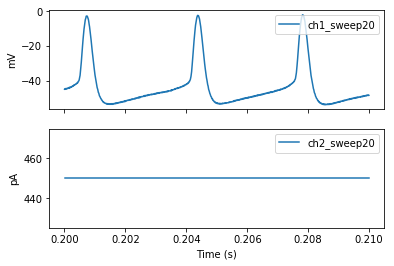

In [15]:
# Now repeat the plot above, only for the given indeces
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(last_voltage[inds])
ax[0].set_ylabel(meta['ch1_units'][0])
ax[0].legend([lastSweep_voltage], loc='upper right')
ax[1].plot(last_current[inds])
ax[1].set_ylabel(meta['ch2_units'][0])
ax[1].set_xlabel('Time (s)')
ax[1].legend([lastSweep_current], loc='upper right')
plt.show()

## Data Analysis for a single cell